In [1]:
import xarray as xr

# read sea ice data
trace_all_iceA_sh = xr.open_dataarray('processed_model_data/trace_all_iceA_sh.nc')
lc_all_iceV_sh = xr.open_dataarray('processed_model_data/lc_all_iceV_sh.nc')


lc_all_temp_50_70S=xr.open_dataarray('processed_model_data/lc_all_temp_50_70S.nc')
trace_all_temp_50_70S=xr.open_dataarray('processed_model_data/trace_all_temp_50_70S.nc')



# Function to find the value at 21000 years
def anomaly(data):
    base_value = data.sel(age=21000, method='nearest')
    return data - base_value

# Calculate anomalies
lc_temp_anomaly = anomaly(lc_all_temp_50_70S)
trace_temp_anomaly = anomaly(trace_all_temp_50_70S)
lc_iceV_anomaly = anomaly(lc_all_iceV_sh)
trace_iceA_anomaly = anomaly(trace_all_iceA_sh)

lc_temp_anomaly

<xarray.DataArray (age: 131)>
array([ 0.2551508 ,  0.38123322,  0.1963234 ,  0.16098022,  0.01566792,
        0.13936043,  0.15659523,  0.18996334,  0.1424551 ,  0.17553806,
        0.05870628,  0.16454506,  0.15921402,  0.07540798, -0.14293861,
       -0.08052254, -0.01228905,  0.09107399, -0.01142788, -0.06753445,
       -0.18145466, -0.09833717, -0.14436245, -0.05657005, -0.19901943,
       -0.26114273, -0.01574421, -0.07130241, -0.12543964, -0.03322506,
        0.        ,  0.2799015 ,  0.25885963,  0.30965805,  0.21701908,
        0.3871603 ,  0.45767403,  0.83497334,  0.9558382 ,  1.0789356 ,
        1.0908222 ,  1.0508852 ,  1.2869911 ,  1.0784054 ,  1.1756029 ,
        1.166605  ,  1.263917  ,  1.2193155 ,  1.2392254 ,  1.1101007 ,
        1.1181602 ,  1.1326523 ,  1.0459976 ,  1.1906137 ,  1.3440151 ,
        1.2763634 ,  1.1321716 ,  1.1741257 ,  1.1341982 ,  1.1844931 ,
        1.3004751 ,  1.2479153 ,  1.3359118 ,  1.380496  ,  1.2144585 ,
        1.438694  ,  1.4859333 ,  1.4064112 ,  1.6482534 ,  1.881712  ,
        1.7690287 ,  2.0174809 ,  2.2236757 ,  2.4543371 ,  2.3509197 ,
        2.591817  ,  2.8105755 ,  3.0560255 ,  3.0758648 ,  3.2208166 ,
        3.297761  ,  3.531681  ,  3.5342493 ,  3.5744495 ,  3.5566473 ,
        3.5875778 ,  3.6578798 ,  3.5385256 ,  3.749712  ,  3.780836  ,
        3.9103098 ,  3.9920921 ,  4.1215124 ,  4.2716646 ,  4.363598  ,
        4.4411926 ,  4.5870495 ,  4.572939  ,  4.7736464 ,  5.047902  ,
        5.185072  ,  5.149688  ,  5.4304323 ,  5.4992123 ,  5.598236  ,
        5.6280193 ,  5.6592903 ,  5.83482   ,  5.809084  ,  5.874358  ,
        5.8171372 ,  6.0072756 ,  6.085205  ,  6.0722857 ,  6.0166407 ,
        6.0908146 ,  5.995818  ,  6.121309  ,  6.1759024 ,  6.3794875 ,
        6.466456  ,  6.5000954 ,  6.7222443 ,  6.8456244 ,  7.0225043 ,
        7.14846   ,  7.3399005 ,  7.4457526 ,  7.619248  ,  7.959886  ,
        8.40509   ], dtype=float32)
Coordinates:
  * age      (age) float32 2.4e+04 2.39e+04 2.38e+04 ... 1.11e+04 1.1e+04

In [69]:
trace_temp_anomaly

<xarray.DataArray (age: 2204)>
array([-0.25928194, -0.14349022, -0.12397868, ...,  7.25276131,
        7.41693776,  7.5345347 ])
Coordinates:
  * age      (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -10.0 -20.0 -30.0

|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 25
cps [14. 26. 37. 42. 49. 54. 60. 68.]
selected_cp_index: 1
cp_age= 21400.0
cp_age_all= [20300.0, 17200.0, 21400.0]
cp_age_CI= [21705.092 20874.254]
cp_age_CI_all= [[22798.312 22211.324 22600.   ]
 [21705.092 20874.254 21400.   ]
 [20454.332 20122.242 20300.   ]
 [20094.285 19459.889 19800.   ]
 [19568.555 18868.2   19100.   ]
 [18947.6   18245.96  18600.   ]
 [18309.643 17864.049 18000.   ]
 [17659.668 17102.219 17200.   ]
 [      nan       nan       nan]
 [      nan       nan       nan]]


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


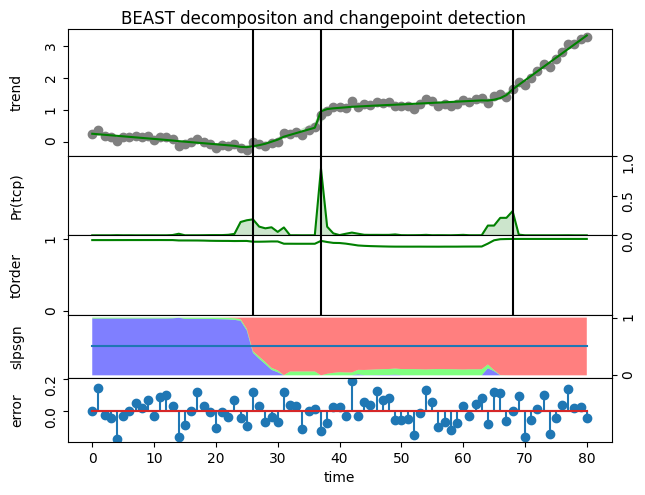

In [7]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

# crop the lc_temp_anomaly and drop values corresponding to ages<16000
lc_temp_anomaly_cropped= lc_temp_anomaly.where(lc_temp_anomaly['age']>=15000, drop=True)

# flip the lc_temp_anomaly_cropped upside down
lc_temp_anomaly_flipped = np.flip(lc_temp_anomaly_cropped, axis=0)

# Calculate the cp_info for the median of each dataset
cp_info = cpf.find_cp(lc_temp_anomaly_flipped.values, lc_temp_anomaly_flipped['age'].values, rb_plot=True, age_step=100)

# Extract data for plotting from cp_info
# data_flipped = cp_info['data_flipped']
cpOccPr = cp_info['cpOccPr']
slpSgnPosPr = cp_info['slpSgnPosPr']
age = cp_info['age']
cp_age = cp_info['cp_age']
cp_age_CI=cp_info['cp_age_CI']
cp_age_all=cp_info['cp_age_all']
cp_age_CI_all=cp_info['cp_CI_all']


cp_age_CI_all=lc_temp_anomaly['age'].values[0]-100*cp_age_CI_all

model_cps={'lc_temp': 21400, 'lc_iceV': 20300}
model_cps_ci={'lc_temp': [21705.092, 20874.254]}
model_cps_top3={'lc_temp':[20300.0, 17200.0, 21400.0]}

print('cp_age=',cp_age)
print('cp_age_all=',cp_age_all) 
print('cp_age_CI=',cp_age_CI)
print('cp_age_CI_all=',cp_age_CI_all)





\Progress:100.0% done[==============================================================]


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


pospr_diff_max_index: 57
cps [13. 26. 30. 38. 45. 52. 57. 65.]
selected_cp_index: 6
cp_age= 18300.0
cp_age_all= [20200.0, 18300.0, 21400.0]
cp_age_CI= [18476.8   17983.746]
cp_age_CI_all= [[23352.709 22232.473 22700.   ]
 [21873.963 21156.37  21400.   ]
 [21263.57  20735.352 21000.   ]
 [20385.123 20025.432 20200.   ]
 [19954.139 19157.895 19500.   ]
 [19259.562 18533.473 18800.   ]
 [18476.8   17983.746 18300.   ]
 [17966.86  17009.953 17500.   ]
 [      nan       nan       nan]
 [      nan       nan       nan]]


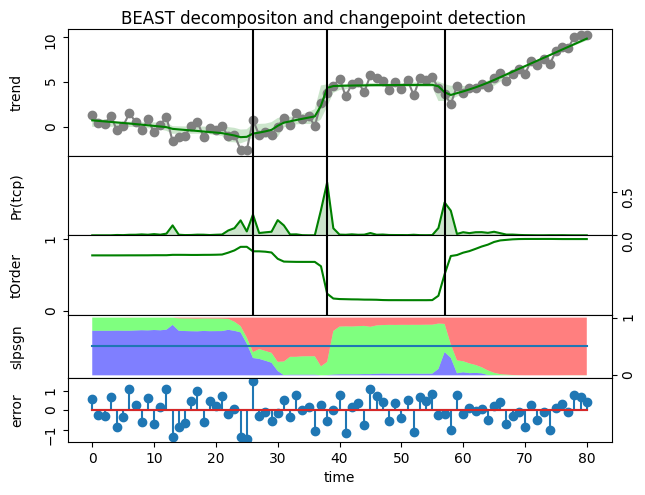

In [14]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

'''do the same change point analysis for the lc_iceV_anomaly such as above'''
# crop the lc_iceV_anomaly and drop values corresponding to ages<16000
lc_iceV_anomaly_cropped= lc_iceV_anomaly.where(lc_iceV_anomaly['age']>=15000, drop=True)

# flip the lc_iceV_anomaly_cropped upside down
lc_iceV_anomaly_flipped = np.flip(lc_iceV_anomaly_cropped, axis=0)

# Calculate the cp_info for the median of each dataset
cp_info = cpf.find_cp(lc_iceV_anomaly_flipped.values*-1, lc_iceV_anomaly_flipped['age'].values, rb_plot=True, age_step=100)

# Extract data for plotting from cp_info
# data_flipped = cp_info['data_flipped']
cpOccPr = cp_info['cpOccPr']
slpSgnPosPr = cp_info['slpSgnPosPr']
age = cp_info['age']
cp_age = cp_info['cp_age']
cp_age_CI=cp_info['cp_age_CI']
cp_age_all=cp_info['cp_age_all']
cp_age_CI_all=cp_info['cp_CI_all']



cp_age_CI_all=lc_iceV_anomaly_cropped['age'].values[0]-100*cp_age_CI_all

model_cps={'lc_temp': 21400, 'lc_iceV': 21400}
model_cps_ci={'lc_temp': [21705.092, 20874.254], 'lc_iceV': [21869.123, 21160.523]}
model_cps_top3={'lc_temp':[20300.0, 17200.0, 21400.0], 'lc_iceV':[20200.0, 18300.0, 21400.0]}

print('cp_age=',cp_age)
print('cp_age_all=',cp_age_all)
print('cp_age_CI=',cp_age_CI)
print('cp_age_CI_all=',cp_age_CI_all)



|Progress:100.0% done[==============================================================]


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


pospr_diff_max_index: 306
cps [204. 307. 387. 392. 409. 420. 423. 428. 483. 494.]
selected_cp_index: 1
cp_age= 18930.0
cp_age_all= [17170.0, 18930.0, 19960.0]
cp_age_CI= [19026.6   18876.088]
cp_age_CI_all= [[20004.285 19880.523 19960.   ]
 [19026.6   18876.088 18930.   ]
 [18335.084 18111.193 18130.   ]
 [18102.53  18010.01  18080.   ]
 [17988.053 17854.54  17910.   ]
 [17866.188 17781.072 17800.   ]
 [17798.176 17741.592 17770.   ]
 [17755.738 17669.172 17720.   ]
 [17198.203 17147.54  17170.   ]
 [17107.996 16973.285 17060.   ]]


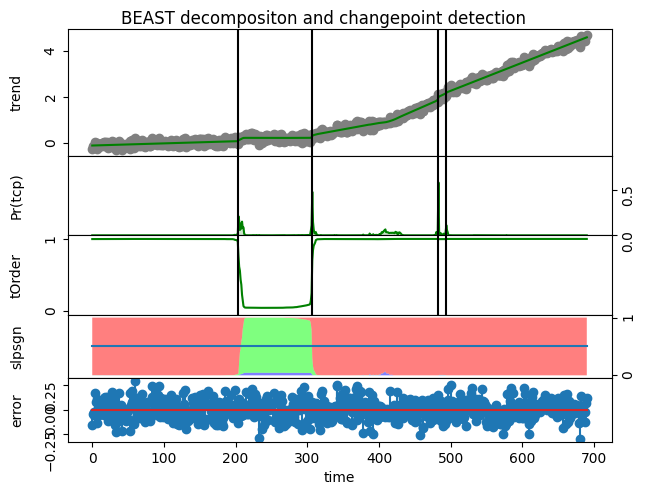

In [15]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

trace_temp_anomaly_cropped= trace_temp_anomaly.where(trace_temp_anomaly['age']>=15000, drop=True)

trace_temp_anomaly_flipped = np.flip(trace_temp_anomaly_cropped, axis=0)

# Calculate the cp_info for the median of each dataset
cp_info = cpf.find_cp(trace_temp_anomaly_flipped.values, trace_temp_anomaly_flipped['age'].values, rb_plot=True, age_step=10)

# Extract data for plotting from cp_info
# data_flipped = cp_info['data_flipped']
cpOccPr = cp_info['cpOccPr']
slpSgnPosPr = cp_info['slpSgnPosPr']
age = cp_info['age']
cp_age = cp_info['cp_age']
cp_age_CI=cp_info['cp_age_CI']
cp_age_all=cp_info['cp_age_all']
cp_age_CI_all=cp_info['cp_CI_all']


cp_age_CI_all=trace_temp_anomaly_cropped['age'].values[0]-10*cp_age_CI_all

model_cps={'lc_temp': 21400, 'lc_iceV': 21400, 'trace_temp': 19960}
model_cps_ci={'lc_temp': [21705.092, 20874.254], 'lc_iceV': [21869.123, 21160.523], 'trace_temp': [20004.285, 19880.523]}
model_cps_top3={'lc_temp':[20300.0, 17200.0, 21400.0], 'lc_iceV':[20200.0, 18300.0, 21400.0], 'trace_temp':[17170.0, 18930.0, 19960.0]}

print('cp_age=',cp_age)
print('cp_age_all=',cp_age_all)
print('cp_age_CI=',cp_age_CI)
print('cp_age_CI_all=',cp_age_CI_all)

\Progress:100.0% done[==============================================================]


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


pospr_diff_max_index: 306
cps [185. 193. 197. 204. 211. 307. 409. 423. 494. 531.]
selected_cp_index: 5
cp_age= 18930.0
cp_age_all= [18930.0, 20030.0, 17060.0]
cp_age_CI= [18959.582 18904.97 ]
cp_age_CI_all= [[20197.4   20111.951 20150.   ]
 [20109.725 20042.988 20070.   ]
 [20056.307 20000.018 20030.   ]
 [20004.418 19930.773 19960.   ]
 [19929.645 19759.166 19890.   ]
 [18959.582 18904.97  18930.   ]
 [17965.836 17835.324 17910.   ]
 [17844.773 17710.96  17770.   ]
 [17115.035 16946.133 17060.   ]
 [16871.764 16544.742 16690.   ]]


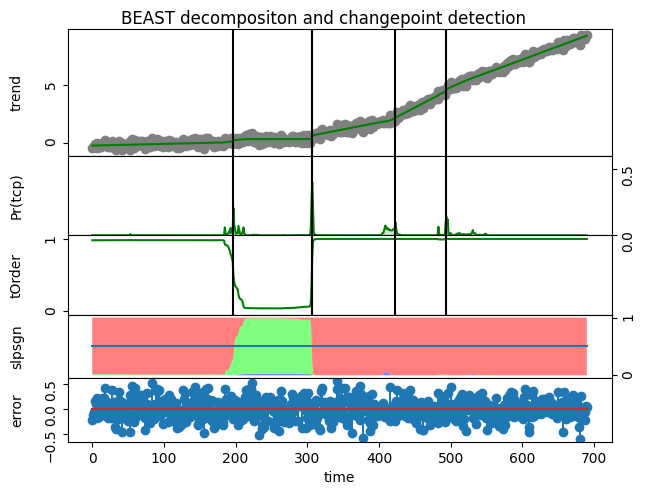

In [35]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap

trace_iceA_anomaly_cropped= trace_iceA_anomaly.where(trace_iceA_anomaly['age']>=15000, drop=True)

trace_iceA_anomaly_flipped = np.flip(trace_iceA_anomaly_cropped, axis=0)

# Calculate the cp_info for the median of each dataset  
cp_info = cpf.find_cp(trace_iceA_anomaly_flipped.values*-1, trace_iceA_anomaly_flipped['age'].values, rb_plot=True, age_step=10)

# Extract data for plotting from cp_info
# data_flipped = cp_info['data_flipped']
cpOccPr = cp_info['cpOccPr']
slpSgnPosPr = cp_info['slpSgnPosPr']
age = cp_info['age']
cp_age = cp_info['cp_age']
cp_age_all=cp_info['cp_age_all']
cp_age_CI=cp_info['cp_age_CI']
cp_age_CI_all=cp_info['cp_CI_all']


cp_age_CI_all=trace_iceA_anomaly_cropped['age'].values[0]-10*cp_age_CI_all

model_cps={'lc_temp': 21400, 'lc_iceV': 21400, 'trace_temp': 19960, 'trace_iceA': 20030}
model_cps_ci={'lc_temp': [21705.092, 20874.254], 'lc_iceV': [21869.123, 21160.523], 'trace_temp': [20004.285, 19880.523], 'trace_iceA': [20086.348, 20000.537]}
model_cps_top3={'lc_temp':[20300.0, 17200.0, 21400.0], 'lc_iceV':[20200.0, 18300.0, 21400.0], 'trace_temp':[17170.0, 18930.0, 19960.0], 'trace_iceA':[18930.0, 20030.0, 17060.0]}

print('cp_age=',cp_age)
print('cp_age_all=',cp_age_all)
print('cp_age_CI=',cp_age_CI)
print('cp_age_CI_all=',cp_age_CI_all)

In [39]:
import xarray as xr

# read sea ice data
trace_all_iceA_sh = xr.open_dataarray('processed_model_data/trace_all_iceA_sh.nc')
lc_all_iceV_sh = xr.open_dataarray('processed_model_data/lc_all_iceV_sh.nc')


lc_all_temp_50_70S=xr.open_dataarray('processed_model_data/lc_all_temp_50_70S.nc')
trace_all_temp_50_70S=xr.open_dataarray('processed_model_data/trace_all_temp_50_70S.nc')



# Function to find the value at 21000 years
def anomaly(data):
    base_value = data.sel(age=21000, method='nearest')
    return data - base_value

# Calculate anomalies
lc_temp_anomaly = anomaly(lc_all_temp_50_70S)
trace_temp_anomaly = anomaly(trace_all_temp_50_70S)
lc_iceV_anomaly = anomaly(lc_all_iceV_sh)
trace_iceA_anomaly = anomaly(trace_all_iceA_sh)

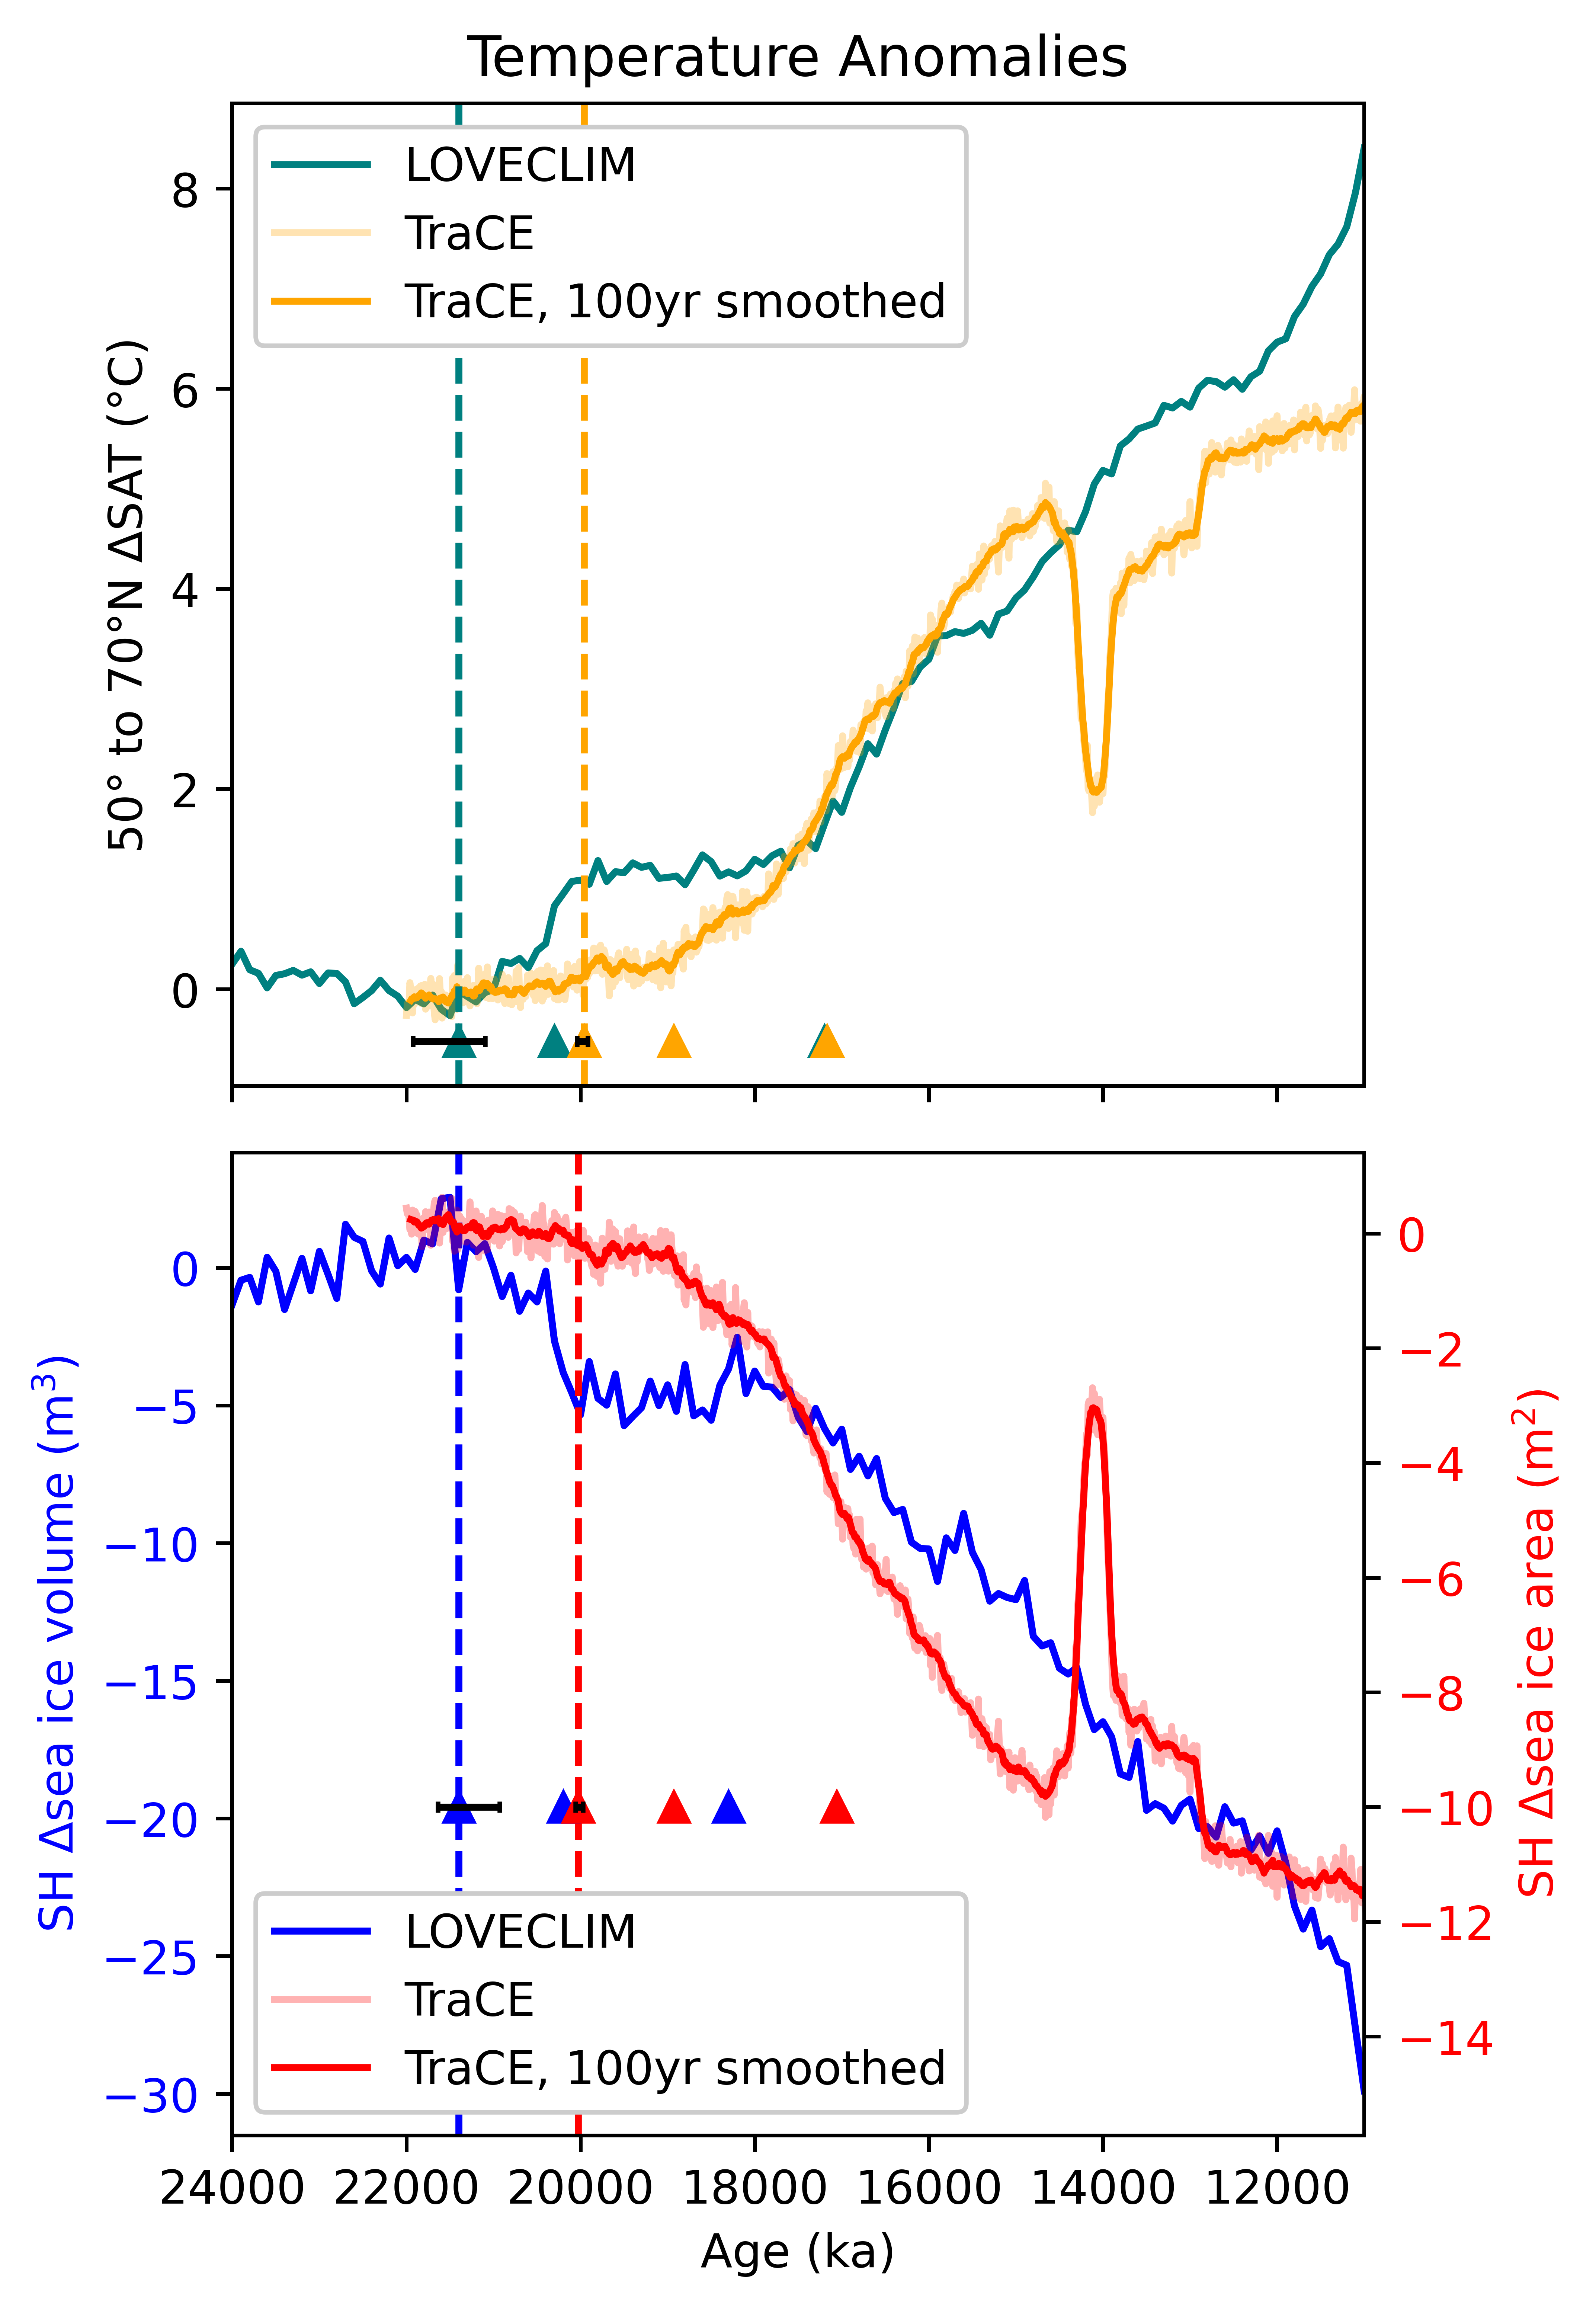

In [48]:
import matplotlib.pyplot as plt
import numpy as np

model_cps = {'lc_temp': 21400, 'lc_iceV': 21400, 'trace_temp': 19960, 'trace_iceA': 20030}
model_cps_ci = {'lc_temp': [21705.092, 20874.254], 'lc_iceV': [21869.123, 21160.523], 
                'trace_temp': [20004.285, 19880.523], 'trace_iceA': [20086.348, 20000.537]}

# Calculate smoothed anomalies
smoothed_trace_temp_anomaly = trace_temp_anomaly.rolling(age=10, center=True).mean()
smoothed_trace_iceA_anomaly = trace_iceA_anomaly.rolling(age=10, center=True).mean()

# Define the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 7), sharex=True, dpi=900)

# Plot the temperature anomalies
ax1.plot(lc_temp_anomaly['age'], lc_temp_anomaly, label='LOVECLIM', color='teal')
ax1.plot(trace_temp_anomaly['age'], trace_temp_anomaly, label='TraCE', color='orange', alpha=0.3)
ax1.plot(smoothed_trace_temp_anomaly['age'], smoothed_trace_temp_anomaly, label='TraCE, 100yr smoothed', linestyle='-', color='orange')
ax1.set_title('Temperature Anomalies')
ax1.set_ylabel('50° to 70°N ΔSAT (°C)')
# ax1.legend()
# add legend and set the alpha of the box
ax1.legend(loc='upper left', framealpha=1)

# Add vertical lines and spans for control points and their CIs
ax1.axvline(x=model_cps['lc_temp'], color='teal', linestyle='--', label='CP lc_temp')
# ax1.axvspan(model_cps_ci['lc_temp'][1], model_cps_ci['lc_temp'][0], color='teal', alpha=0.3, label='CI lc_temp')
# plot the error bar at the cp according to cp ci

ax1.axvline(x=model_cps['trace_temp'], color='orange', linestyle='--', label='CP trace_temp')
# ax1.axvspan(model_cps_ci['trace_temp'][1], model_cps_ci['trace_temp'][0], color='orange', alpha=0.3, label='CI trace_temp')


# plot the top three change points as colored triangles
for i, cp in enumerate(model_cps_top3['lc_temp']):
    ax1.plot(cp, -0.52, marker='^', color='teal')

ax1.errorbar(model_cps['lc_temp'], -0.52, xerr=[[model_cps_ci['lc_temp'][0]-model_cps['lc_temp']], [model_cps['lc_temp']-model_cps_ci['lc_temp'][1]]], fmt='none', color='teal', ecolor='k',capsize=1.2)

for i, cp in enumerate(model_cps_top3['trace_temp']):
    ax1.plot(cp, -0.52, marker='^', color='orange')

ax1.errorbar(model_cps['trace_temp'], -0.52, xerr=[[model_cps_ci['trace_temp'][0]-model_cps['trace_temp']], [model_cps['trace_temp']-model_cps_ci['trace_temp'][1]]], fmt='none', color='orange', ecolor='k',capsize=1.2)


# Plot the ice data anomalies with twin y-axis
ax2.plot(lc_iceV_anomaly['age'], lc_iceV_anomaly, color='b', label='LOVECLIM')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('SH Δsea ice volume (m$^3$)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax2.twinx()
ax3.plot(trace_iceA_anomaly['age'], trace_iceA_anomaly, color='r', label='TraCE', alpha=0.3)
ax3.plot(smoothed_trace_iceA_anomaly['age'], smoothed_trace_iceA_anomaly, label='TraCE, 100yr smoothed', linestyle='-', color='r', alpha=1)
ax3.set_ylabel('SH Δsea ice area (m$^2$)', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Add vertical lines and spans for control points and their CIs
ax2.axvline(x=model_cps['lc_iceV'], color='blue', linestyle='--', label='')
# ax2.axvspan(model_cps_ci['lc_iceV'][1], model_cps_ci['lc_iceV'][0], color='blue', alpha=0.3, label='')
ax3.axvline(x=model_cps['trace_iceA'], color='red', linestyle='--', label='')
# ax3.axvspan(model_cps_ci['trace_iceA'][1], model_cps_ci['trace_iceA'][0], color='red', alpha=0.3, label='')

# plot the top three change points as colored triangles
for i, cp in enumerate(model_cps_top3['lc_iceV']):
    ax3.plot(cp, -10, marker='^', color='blue')

ax3.errorbar(model_cps['lc_iceV'], -10, xerr=[[model_cps_ci['lc_iceV'][0]-model_cps['lc_iceV']], [model_cps['lc_iceV']-model_cps_ci['lc_iceV'][1]]], fmt='none', color='blue', ecolor='k',capsize=1.2)

for i, cp in enumerate(model_cps_top3['trace_iceA']):
    ax3.plot(cp, -10, marker='^', color='red')

ax3.errorbar(model_cps['trace_iceA'], -10, xerr=[[model_cps_ci['trace_iceA'][0]-model_cps['trace_iceA']], [model_cps['trace_iceA']-model_cps_ci['trace_iceA'][1]]], fmt='none', color='red', ecolor='k',capsize=1.2)

# Set xlim for all plots
ax1.set_xlim(24000, 11000)
ax2.set_xlim(24000, 11000)
ax3.set_xlim(24000, 11000)

# Add legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc='lower left',framealpha=1)

plt.tight_layout()
plt.show()


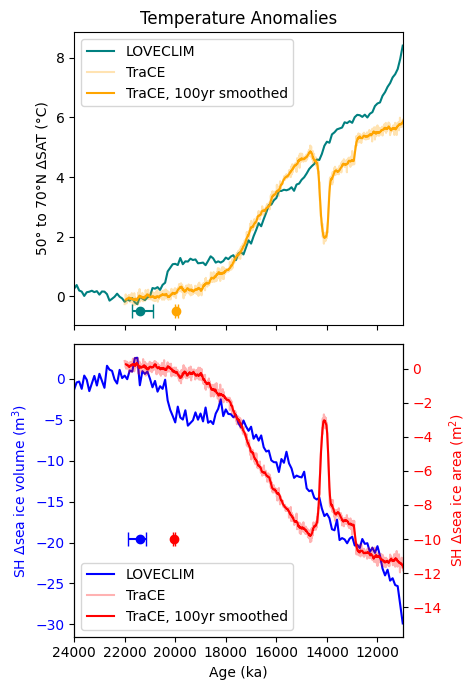

In [26]:
import matplotlib.pyplot as plt
import numpy as np



model_cps={'lc_temp': 21400, 'lc_iceV': 21400, 'trace_temp': 19960, 'trace_iceA': 20030}
model_cps_ci={'lc_temp': [21705.092, 20874.254], 'lc_iceV': [21869.123, 21160.523], 'trace_temp': [20004.285, 19880.523], 'trace_iceA': [20086.348, 20000.537]}



# Calculate smoothed anomalies
smoothed_trace_temp_anomaly = trace_temp_anomaly.rolling(age=10, center=True).mean()
smoothed_trace_iceA_anomaly = trace_iceA_anomaly.rolling(age=10, center=True).mean()

# Define the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 7), sharex=True)

# Plot the temperature anomalies
ax1.plot(lc_temp_anomaly['age'], lc_temp_anomaly, label='LOVECLIM', color='teal')
ax1.plot(trace_temp_anomaly['age'], trace_temp_anomaly, label='TraCE',color='orange', alpha=0.3)
ax1.plot(smoothed_trace_temp_anomaly['age'], smoothed_trace_temp_anomaly, label='TraCE, 100yr smoothed', linestyle='-', color='orange')
ax1.set_title('Temperature Anomalies')
# ax1.set_xlabel('Age (ka)')
ax1.set_ylabel('50° to 70°N ΔSAT (°C)')
ax1.legend()

ax1.errorbar(model_cps['lc_temp'], -0.5, xerr=[[model_cps['lc_temp'] - model_cps_ci['lc_temp'][1]], [model_cps_ci['lc_temp'][0] - model_cps['lc_temp']]], fmt='o', color='teal', capsize=5)
ax1.errorbar(model_cps['trace_temp'], -0.5, xerr=[[model_cps['trace_temp'] - model_cps_ci['trace_temp'][1]], [model_cps_ci['trace_temp'][0] - model_cps['trace_temp']]], fmt='o', color='orange', capsize=5)



# Plot the ice data anomalies with twin y-axis
ax2.plot(lc_iceV_anomaly['age'], lc_iceV_anomaly, color='b', label='LOVECLIM')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('SH Δsea ice volume (m$^3$)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax2.twinx()
ax3.plot(trace_iceA_anomaly['age'], trace_iceA_anomaly, color='r', label='TraCE', alpha=0.3)
ax3.plot(smoothed_trace_iceA_anomaly['age'], smoothed_trace_iceA_anomaly, label='TraCE, 100yr smoothed', linestyle='-', color='r', alpha=1)
ax3.set_ylabel('SH Δsea ice area (m$^2$)', color='r')
ax3.tick_params(axis='y', labelcolor='r')

ax3.errorbar(model_cps['lc_iceV'], -10, xerr=[[model_cps['lc_iceV'] - model_cps_ci['lc_iceV'][1]], [model_cps_ci['lc_iceV'][0] - model_cps['lc_iceV']]], fmt='o', color='b', capsize=5)
ax3.errorbar(model_cps['trace_iceA'], -10, xerr=[[model_cps['trace_iceA'] - model_cps_ci['trace_iceA'][1]], [model_cps_ci['trace_iceA'][0] - model_cps['trace_iceA']]], fmt='o', color='r', capsize=5)


# Set xlim to 24000 to 11000 for all plots
ax1.set_xlim(24000, 11000)
ax2.set_xlim(24000, 11000)
ax3.set_xlim(24000, 11000)

# Add legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower left')

plt.tight_layout()
plt.show()


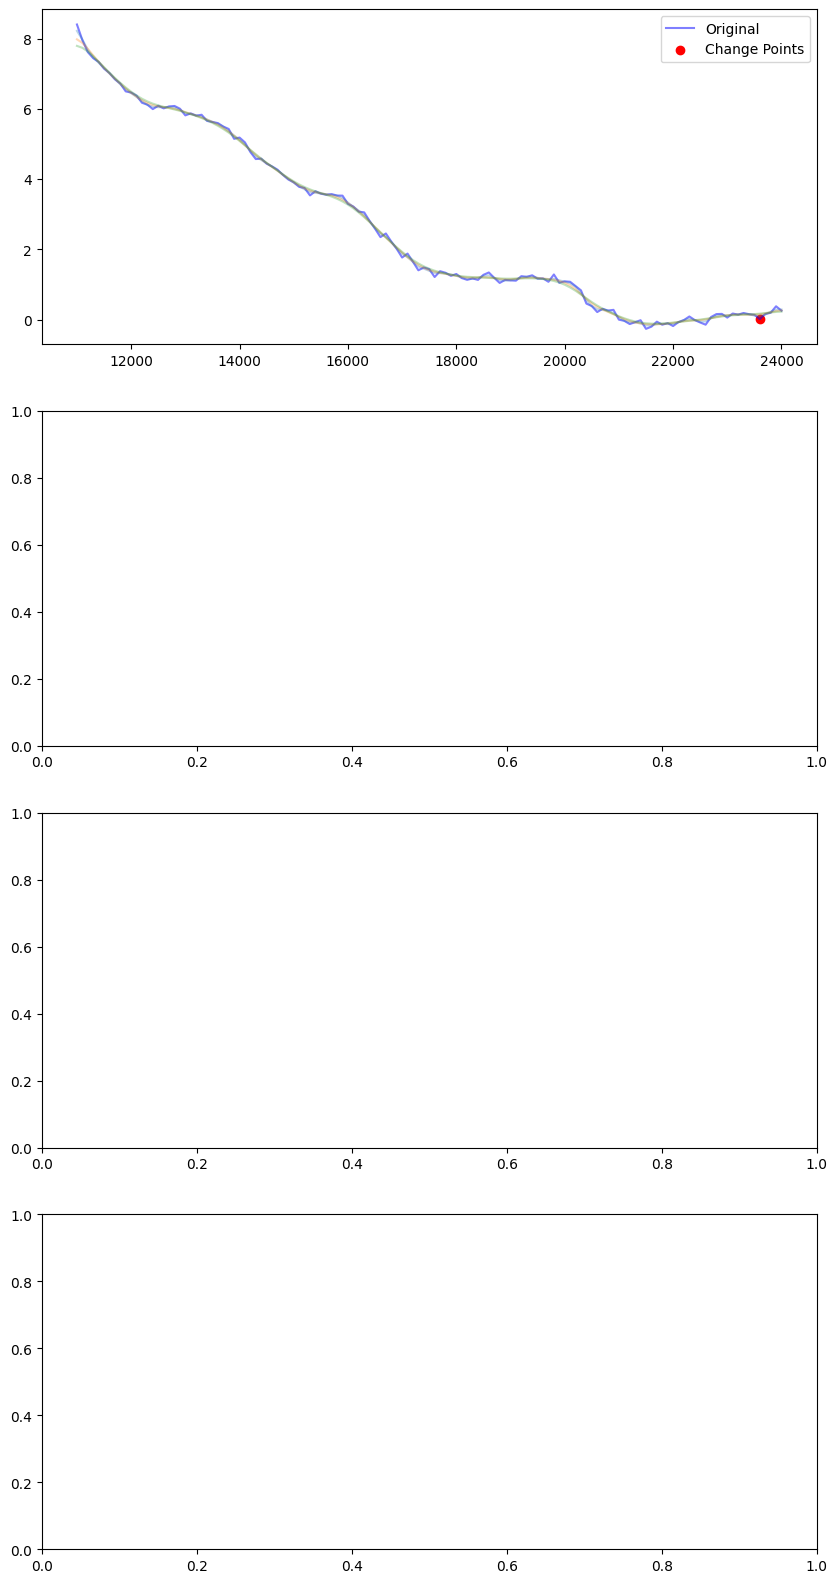

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import ttest_1samp

def smooth_gaussian(data, sigma):
    """Smooth a time series using a Gaussian kernel."""
    return gaussian_filter1d(data, sigma=sigma)

def analyze_time_series(time, data, ax, sigmas=[1,2,3]):
    derivatives_matrix = []

    # Plot the original and smoothed time series
    ax.plot(time, data, label='Original', color='blue', alpha=0.5)
    for sigma in sigmas:
        smoothed_data = smooth_gaussian(data, sigma)
        derivative = np.gradient(smoothed_data)*-1
        derivatives_matrix.append(derivative)
        ax.plot(time, smoothed_data, alpha=0.3)

    # Transpose to analyze time-wise derivatives
    derivatives_matrix = np.array(derivatives_matrix).T

    significance_array = np.zeros_like(data)
    
    for i in range(len(derivatives_matrix)):
        _, p_value = ttest_1samp(derivatives_matrix[i], 0)
        if p_value < 0.05:
            mean_derivative = np.mean(derivatives_matrix[i])
            if mean_derivative < 0:
                significance_array[i] = -1
            elif mean_derivative > 0:
                significance_array[i] = 1


    # find the index where significance_array=1 for the first time
    idx = np.where(significance_array == 1)[0][0]

    ax.scatter(time[idx], data[idx], color='red', label='Change Points')

    ax.legend()


sigmas_lc = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing

fig, axs = plt.subplots(4, 1, figsize=(10, 20))
analyze_time_series(lc_temp_anomaly['age'], lc_temp_anomaly, axs[0])
# analyze_time_series(trace_temp_anomaly['age'], trace_temp_anomaly, axs[1])
# analyze_time_series(lc_iceV_anomaly['age'], lc_iceV_anomaly, axs[2])
# analyze_time_series(trace_iceA_anomaly['age'], trace_iceA_anomaly, axs[3])

# plt.tight_layout()
# plt.show()


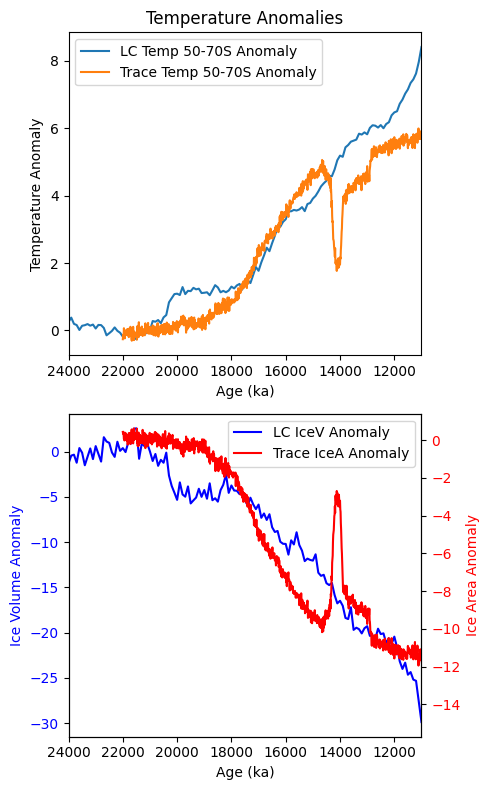

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'lc_all_temp_50_70S', 'trace_all_temp_50_70S', 'lc_all_iceV_sh', 'trace_all_iceA_sh' are loaded and available

# Function to find the value at 21000 years
def anomaly(data):
    base_value = data.sel(age=21000, method='nearest')
    return data - base_value

# Calculate anomalies
lc_temp_anomaly = anomaly(lc_all_temp_50_70S)
trace_temp_anomaly = anomaly(trace_all_temp_50_70S)
lc_iceV_anomaly = anomaly(lc_all_iceV_sh)
trace_iceA_anomaly = anomaly(trace_all_iceA_sh)



# Define the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))

# Plot the temperature anomalies
ax1.plot(lc_temp_anomaly['age'], lc_temp_anomaly, label='LC Temp 50-70S Anomaly')
ax1.plot(trace_temp_anomaly['age'], trace_temp_anomaly, label='Trace Temp 50-70S Anomaly')
ax1.set_title('Temperature Anomalies')
ax1.set_xlabel('Age (ka)')
ax1.set_ylabel('Temperature Anomaly')
ax1.legend()

# Plot the ice data anomalies with twin y-axis
ax2.plot(lc_iceV_anomaly['age'], lc_iceV_anomaly, color='b', label='LC IceV Anomaly')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('Ice Volume Anomaly', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax2.twinx()
ax3.plot(trace_iceA_anomaly['age'], trace_iceA_anomaly, color='r', label='Trace IceA Anomaly')
ax3.set_ylabel('Ice Area Anomaly', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Set xlim to 24000 to 11000 for all plots
ax1.set_xlim(24000, 11000)
ax2.set_xlim(24000, 11000)
ax3.set_xlim(24000, 11000)

# Add legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


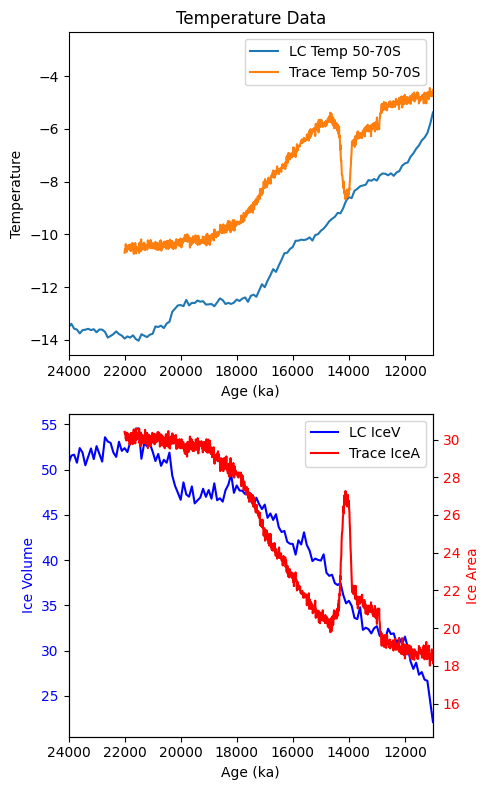

In [10]:
import matplotlib.pyplot as plt

# Define the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))

# Plot the temperature data
ax1.plot(lc_all_temp_50_70S['age'], lc_all_temp_50_70S, label='LC Temp 50-70S')
ax1.plot(trace_all_temp_50_70S['age'], trace_all_temp_50_70S, label='Trace Temp 50-70S')
ax1.set_title('Temperature Data')
ax1.set_xlabel('Age (ka)')
ax1.set_ylabel('Temperature')
ax1.legend()

# Plot the ice data with twin y-axis
ax2.plot(lc_all_iceV_sh['age'], lc_all_iceV_sh, color='b', label='LC IceV')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('Ice Volume', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax2.twinx()
ax3.plot(trace_all_iceA_sh['age'], trace_all_iceA_sh, color='r', label='Trace IceA')
ax3.set_ylabel('Ice Area', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# set xlim to 24000 to 11000 for all plots
ax1.set_xlim(24000, 11000)
ax2.set_xlim(24000, 11000)
ax3.set_xlim(24000, 11000)

# Add legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()
